In [3]:
import pickle as pkl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

In [4]:
pred_path = "/home/ravi/Desktop/Projects/3_keras_knn_image_classifier/y_pred_list.pkl"
truth_path = "/home/ravi/Desktop/Projects/3_keras_knn_image_classifier/y_truth_list.pkl"

In [14]:
# pred_path = "/home/ravi/Desktop/Projects/4_keras_image_class/y_pred_list.pkl"
# truth_path = "/home/ravi/Desktop/Projects/4_keras_image_class/y_truth_list.pkl"

In [3]:
# pred_path = "/home/ravi/Desktop/Projects/7_keras_knn_image_classifier/y_pred_list.pkl"
# truth_path = "/home/ravi/Desktop/Projects/7_keras_knn_image_classifier/y_truth_list.pkl"

In [5]:
with open(pred_path,"rb") as f:
    y_pred_list = pkl.load(f)

In [6]:
with open(truth_path,"rb") as f:
    y_truth_list = pkl.load(f)

In [7]:
labels = np.unique(y_truth_list)

In [8]:
lab2classmap = {}
class2labmap = {}
index = 0
for i in labels:
    lab2classmap[i] = index
    class2labmap[index] = i
    index = index + 1

In [9]:
def fn(actual,predict,m,l,size):
    i=0
    ans=0
    while i< size:
        if actual[i]==l and predict[i]!=l:
            ans+=1
        i+=1
    return ans

def fp(actual,predict,m,l,size):
    i=0
    ans=0
    while i< size:
        if actual[i]!=l and predict[i]==l:
            ans+=1
        i+=1
    return ans

def tn(actual,predict,m,l,size):
    i=0
    ans=0
    while i< size:
        if actual[i]!=l and predict[i]!=l:
            ans+=1
        i+=1
    return ans

def accuracy(TP,TN,FP,FN):
    return float((TP + TN)/float(TP + TN + FP + FN))

def precision(TP,FP):
    return float(TP/float(TP+FP))

def npv(TN,FN):
    return float(TN/float(TN+FN))

def sensitivity(TP,FN):
    return float(TP/float(TP+FN))

def specificity(TN,FP):
    return float(TN/float(TN+FP))

def FPR(FP,TN):
    return float(FP/float(TN+FP))

def FNR(FN,TP):
    return float(FN/float(FN+TP))

def FDR(FP,TP):
    return float(FP/float(TP+FP))

def F1(TP,FP,FN):
    return float(2*TP/float(2*TP + FP + FN))

In [10]:
conf_mat = confusion_matrix(y_truth_list, y_pred_list, labels=labels)

In [11]:
df = pd.DataFrame(conf_mat, columns=labels, index=labels)

In [12]:
df.shape

(34, 34)

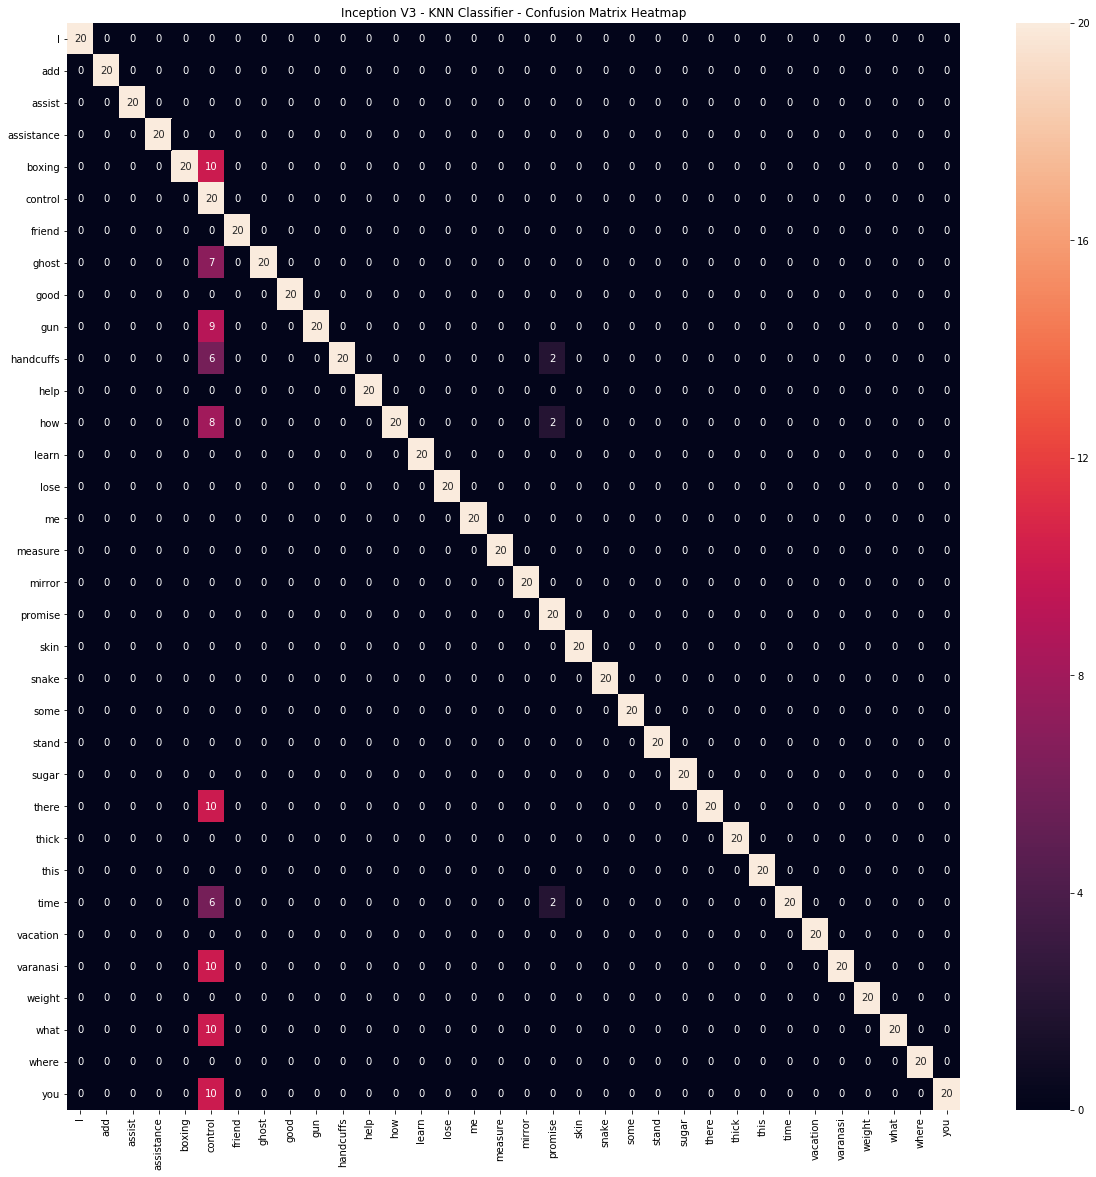

In [15]:
plt.figure(figsize=(20,20))
plt.title("Inception V3 - KNN Classifier - Confusion Matrix Heatmap")
sns.heatmap(df,annot=True, fmt="d")
# plt.savefig("InceptionV3_classifier.png")

In [16]:
conf_mat

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 20,  0, ...,  0,  0,  0],
       [ 0,  0, 20, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 20,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 20]])

In [17]:
n = 2048 #no. of features
m = 34  #no. of classes
size = len(y_truth_list) #size of actual
gamma = 1/n

In [18]:
actual = []
predicted = []

for i in y_truth_list:
    actual.append(lab2classmap[i])

for i in y_pred_list:
    predicted.append(lab2classmap[i])

In [19]:
TP=[]
TN=[]
FP=[]
FN=[]

In [20]:
i=0
while i < m:
    TP.append(conf_mat[i][i])
    i+=1 

i=0
while i < m:
    FP.append(fp(actual,predicted,m,i,size))
    i+=1;

i=0
while i < m:
    TN.append(tn(actual,predicted,m,i,size))
    i+=1;

i=0
while i < m:
    FN.append(fn(actual,predicted,m,i,size))
    i+=1;

In [21]:
metricscols = ["Class", "Accuracy", "Precision", "Negative Predictive Rate", "Sensitivity", "Specificity", "False Positive Rate", "False Negative Rate", "False Discovery Rate", "F1 Score", "No of samples"]

In [22]:
df_results = pd.DataFrame(columns=metricscols)

In [23]:
df_results

,Class,Accuracy,Precision,Negative Predictive Rate,Sensitivity,Specificity,False Positive Rate,False Negative Rate,False Discovery Rate,F1 Score,No of samples


In [24]:
i = 0
while i < m:
    try:
        class_name = class2labmap[i]
        accuracy_v = accuracy(TP[i],TN[i],FP[i],FN[i])
        precision_v = precision(TP[i],FP[i])
        npv_v = npv(TN[i],FN[i])
        sensitivity_v = sensitivity(TP[i],FN[i])
        specificity_v = specificity(TN[i],FP[i])
        FPR_v = FPR(FP[i],TN[i])
        FNR_v = FNR(FN[i],TP[i])
        FDR_v = FDR(FP[i],TP[i])
        F1_v = F1(TP[i],FP[i],FN[i])
        n_samples = 20
        df_results.loc[i+1] = [class_name,accuracy_v, precision_v, npv_v, sensitivity_v, specificity_v, FPR_v, FNR_v, FDR_v, F1_v, n_samples]
    except:
        print("Error"+str(i))
    i = i + 1

In [25]:
df_results.sort_values(by="F1 Score",inplace=True,ascending=False)

In [162]:
# df_results.to_csv("KNN_Classifier_metrics.csv")

In [188]:
# df_results.to_csv("InceptionV3_classifier_metrics.csv")

In [26]:
# df_results.to_csv("InceptionV3_KNN_classifier_metrics.csv")

In [27]:
df_results.head()

,Class,Accuracy,Precision,Negative Predictive Rate,Sensitivity,Specificity,False Positive Rate,False Negative Rate,False Discovery Rate,F1 Score,No of samples
1,I,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,20
16,me,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,20
33,where,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,20
31,weight,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,20
29,vacation,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,20
